## Univelcity Virtual Intership -- Week 1

#### Instruction.

This file contains transactions made by certain users over a period of time.

Carry out an exploratory analysis to glean out insights and trends in the dataset.

Find a means to relate it with external data to help understand user behaviour. 

Try to notice trends in what triggers transactions at certain times of the year, 

what could be the possible cause of increased failed transactions… etc.

Make a mini presentation with the use of the jupyter slides extension and hide the input cells of the selected pages of the slide.

In [4]:
# importing dependencies

import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_theme(context='paper', 
              style='whitegrid', 
              palette='coolwarm_r')

import matplotlib.pyplot as plt 
%matplotlib inline

In [9]:
# importing and viewing transaction data

data = pd.read_csv('txn_data.csv', index_col='Unnamed: 0')
data.head()

,acct_no,txnYear,txnMonth,txnDay,status,no of txns
0,1001192k,2019,10,29,successful,1
1,1001192k,2019,11,12,failed,2
2,1001192k,2019,11,18,failed,1
3,1001192k,2019,11,27,successful,1
4,1001192k,2019,12,8,failed,1


In [77]:
# manipulating the dates

data['txnYear'], data['txnMonth'], data['txnDay'] = data['txnYear'].astype(str),data['txnMonth'].astype(str),data['txnDay'].astype(str)
data['comDate'] = data['txnYear']+ data['txnMonth']+ data['txnDay']
data['Date'] = data['comDate'].apply(lambda x:dt.datetime.strptime(x,'%Y%m%d'))
data['month'] = data['comDate'].apply(lambda x:dt.datetime.strptime(x,'%Y%m%d').strftime('%B'))

In [141]:
ate = data['txnYear']+ data['txnMonth']
data['ate']=ate.apply(lambda x:dt.datetime.strptime(x,'%Y%m'))

In [83]:
data = data.set_index('Date')

In [84]:
#  ploting the frequency of transactions per month

def plot_months(): 
    plt.figure(figsize=(15,5))
    sns.countplot(x='month', data=data ,order=['January', 'February', 'March', 
                                               'April', 'May', 'June', 
                                               'July', 'August', 'September',
                                               'October', 'November', 'December'])

    plt.show()

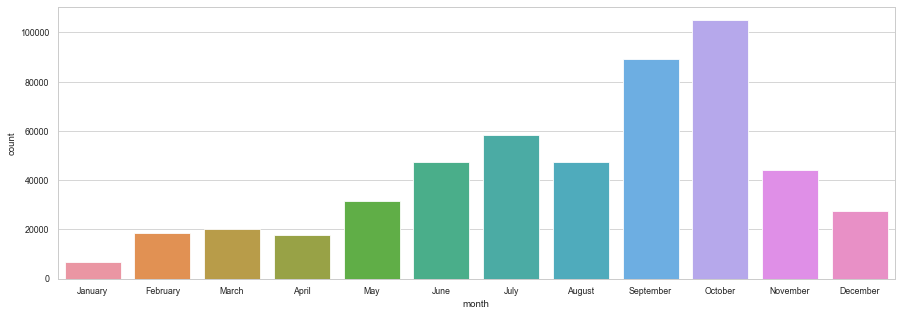

In [85]:
plot_months()

In [71]:
data['status'].unique()

array(['successful', 'failed', 'initialized', 'declined', 'pending',
       'debited'], dtype=object)

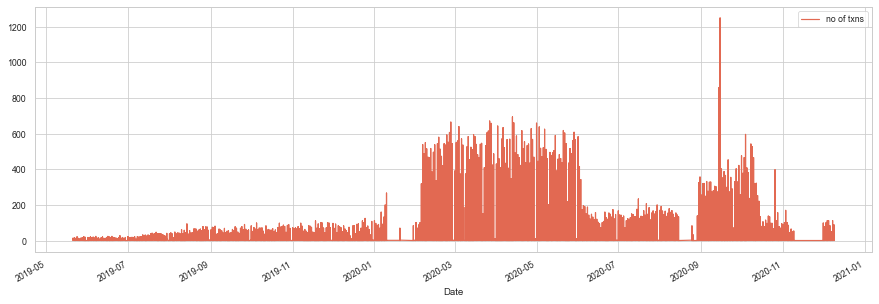

In [101]:
data[data['status']=='successful'].plot(figsize=(15,5))
plt.show()

In [109]:
data.groupby('status').sum()

,no of txns
status,
debited,37
declined,13091
failed,46239
initialized,1466
pending,65
successful,1176531


<AxesSubplot:xlabel='Date'>

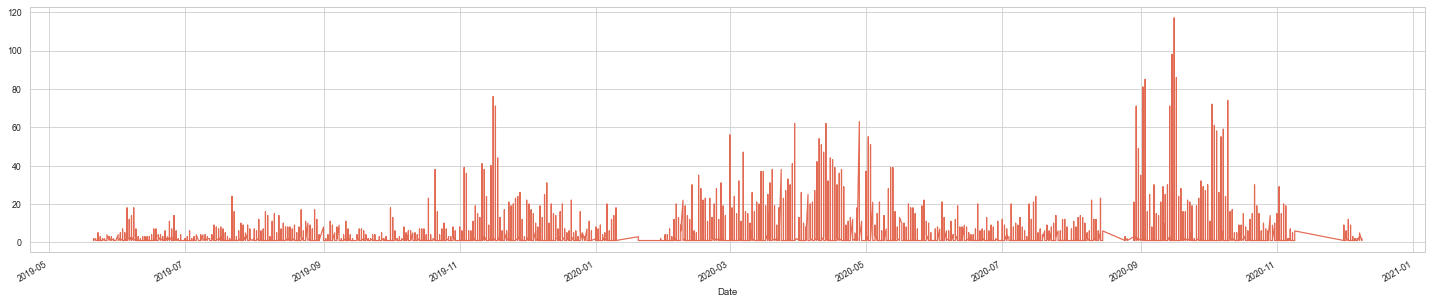

In [137]:
data[data['status']=='failed']['no of txns'].plot(kind='line', figsize=(25,5))

<AxesSubplot:xlabel='acct_no'>

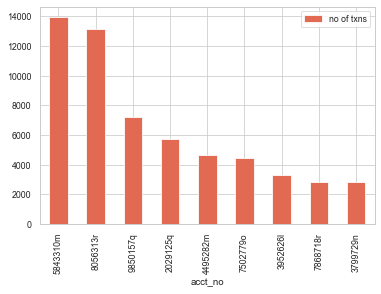

In [134]:
top_customers = data.groupby(['acct_no']).sum()
top_customers.sort_values(by='no of txns', ascending=False)[1:10].plot(kind='bar')

<AxesSubplot:xlabel='ate'>

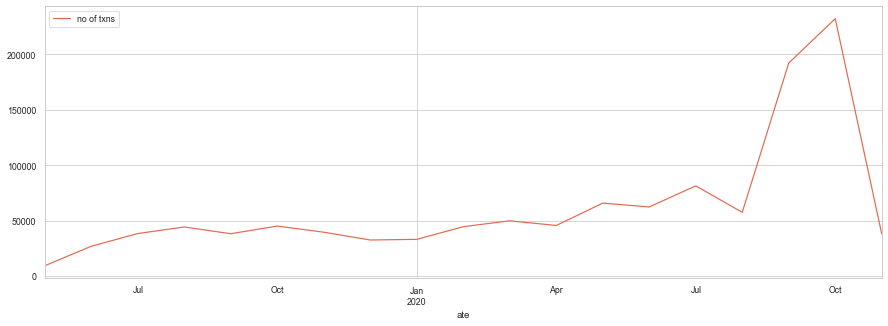

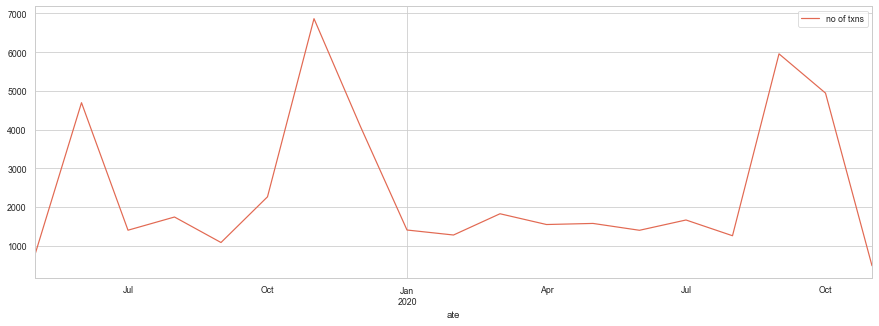

In [148]:
data[data['status']=='successful'].groupby('ate').sum().plot(figsize=(15,5))
data[data['status']=='failed'].groupby('ate').sum().plot(figsize=(15,5))